# Lead-lag ilişkisi için incelemeye giriş
2018-11-26 ve 2018-11-30 günleri için teo-fiyat değerlerine bağlı nedensellik çalışması. 


['causality181126_75656_8205765.csv', 'causality181130_75656_8205765.csv']


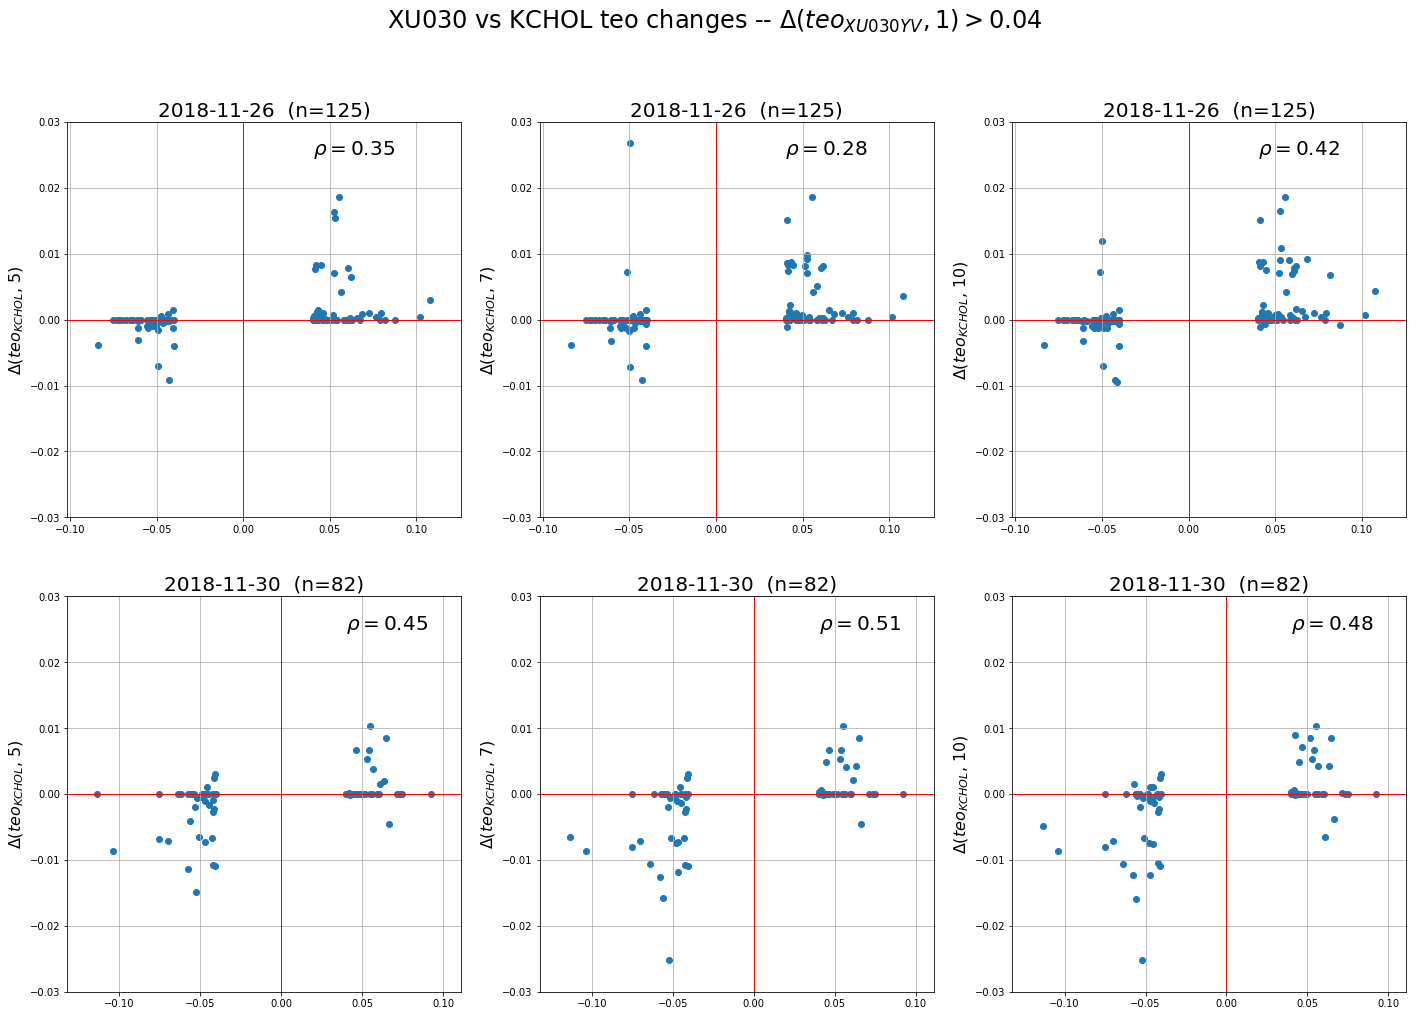

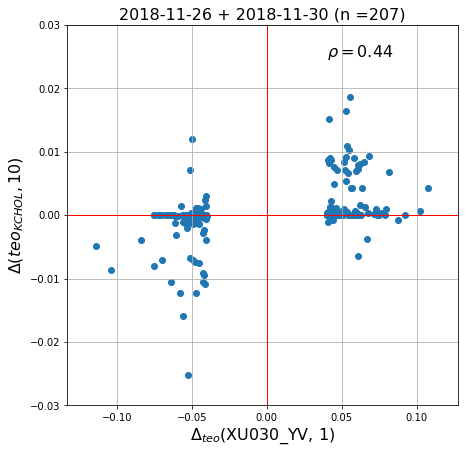

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import os
from functools import reduce

o_files = []
os.chdir('/home/hrn/pyITCH')
for file in os.listdir():
    if file.startswith('causality') and file.endswith("75656_8205765.csv"):
        o_files.append(file)

# 31, 32, 33

x_l = [pd.read_csv(f) for f in o_files]
x_l = [x.loc[abs(x['pivot_diff']) > .04] for x in x_l]
print(o_files)

# print(type(x_l[0]))
# print(x.columns)
# x = x.loc[abs(x['pivot_diff']) > .04]

fig, ax = plt.subplots(nrows=2, ncols=3,figsize=(24,16))
fig.suptitle('XU030 vs KCHOL teo changes -- $\Delta(teo_{XU030YV},1) > 0.04$', fontsize=24)
time_leaps = [5,7,10]
days = ['2018-11-26', '2018-11-30']


for i, row in enumerate(ax):
    x=x_l[i]
    xx = x['pivot_diff']
    n = len(xx)
    for j, col in enumerate(row):
        yy = x.iloc[:,32+j]
        rho, p_value = stats.pearsonr(xx, yy)
        col.scatter(xx ,yy)
        col.set_ylabel('$\Delta(teo_{KCHOL}$, ' +
                       time_leaps[j].__str__()+ ')',
                       fontsize=16)
        col.axhline(linewidth=1, color='r')
        col.axvline(linewidth=1, color='r')
        col.grid(True)
        col.set_ylim((-0.03, 0.03))
        col.set_title(days[i] +'  (n=' + str(n) + ')', fontsize=20)
        col.text(0.04,0.025,r'$\rho = {0:.2f}$'.format(rho),fontsize=20)
plt.show()

x = pd.concat(x_l)
print("")
[i for i,x  in enumerate(x.columns) if x == 'pivot_diff']
ind,  = np.where(x.columns =='pivot_diff')
pairs = x['pivot_diff'] , x['x_diff_10-0']
# np.corrcoef(pairs)
a = np.array(pairs).transpose()
rho, p_value = stats.pearsonr(a[:,0], a[:,1])

plt.figure(figsize=(7,7))
plt.xlabel('$\Delta_{teo}$(XU030_YV, 1)',fontsize=16)
plt.ylabel('$\Delta(teo_{KCHOL},10)$',fontsize=16)
plt.scatter(a[:,0], a[:,1])
plt.grid(True)
plt.axhline(linewidth=1, color='r')
plt.axvline(linewidth=1, color='r')
plt.ylim((-0.03, 0.03)) 
plt.text(0.04,0.025,r'$\rho = {0:.2f}$'.format(rho),fontsize=16)
plt.title('2018-11-26 + 2018-11-30' + ' (n ='+ str(x.shape[0]) + ')',fontsize=16)
plt.show()

In [7]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()



Confusion matrix, without normalization
[[56  0  9]
 [33  0 33]
 [16  0 60]]
Normalized confusion matrix
[[0.86 0.   0.14]
 [0.5  0.   0.5 ]
 [0.21 0.   0.79]]


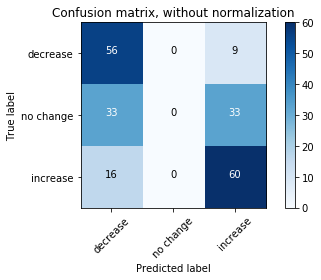

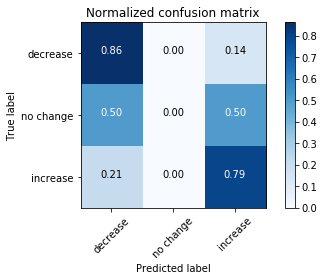

####################################################################################################


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import math
import itertools
from sklearn.metrics import confusion_matrix

class_names = ['decrease','no change','increase']

y_true = [np.sign(i) for i in x['x_diff_10-0']]
y_pred = [np.sign(i) for i in x['pivot_diff']]


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_true, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

print('#'*100)


In [9]:
from sklearn.metrics import  matthews_corrcoef, mutual_info_score
from sklearn.metrics import adjusted_rand_score, r2_score , accuracy_score

cnf_matrix[[True,False,True],:]
cnf_matrix2d = np.delete(cnf_matrix,[1,3,4,5,7]).reshape(2,2)
cnf_matrix2d
oddsratio, pvalue = stats.fisher_exact(cnf_matrix2d)
print('Fischer exact test p-val: ',p_value)
res = stats.chi2_contingency(cnf_matrix2d)
print('Chi-square test p-val: ', res[1])
mcc = matthews_corrcoef(y_true, y_pred)
print("Mathews correlation coef. =", mcc)
acc = accuracy_score( y_true, y_pred)
print('Accuracy score: ',acc)
mi = mutual_info_score( y_true, y_pred)
print('Mutual information score: ',mi)
ari = adjusted_rand_score( y_true, y_pred)
print('Adjusted random score: ',ari)

# oddsratio, pvalue = stats.fisher_exact(y_true, y_pred)

Fischer exact test p-val:  4.7811375026744694e-11
Chi-square test p-val:  4.716240806707728e-14
Mathews correlation coef. = 0.38191850655986165
Accuracy score:  0.5603864734299517
Mutual information score:  0.15680152332762626
Adjusted random score:  0.18807585113853958


In [11]:
from IPython.core.display import HTML
def css_styling():
    styles = open("custom.css", "r").read()
    return HTML(styles)
css_styling()